In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Importando a DF

In [22]:
url = 'https://raw.githubusercontent.com/allanspadini/dados-com-muitas-dimensoes/main/dados/hotel.csv'

df = pd.read_csv(url)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [23]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
required_car_parking_space              0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
type_of_meal_plan_Meal Plan 1           0
type_of_meal_plan_Meal Plan 2           0
type_of_meal_plan_Meal Plan 3           0
type_of_meal_plan_Not Selected          0
room_type_reserved_Room_Type 1          0
room_type_reserved_Room_Type 2          0
room_type_reserved_Room_Type 3          0
room_type_reserved_Room_Type 4          0
room_type_reserved_Room_Type 5          0
room_type_reserved_Room_Type 6    

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

# Primeiros passos com ML

In [25]:
x = df.drop('booking_status', axis=1)  
y = df['booking_status']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.3, stratify=y)

## RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc = RandomForestClassifier(random_state=2)

In [30]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=2)

In [31]:
rfc.score(x_test, y_test)

0.920636470128856

In [32]:
df['booking_status'].value_counts(normalize=True) 

booking_status
0    0.5
1    0.5
Name: proportion, dtype: float64

# Entendendo as features

<Axes: xlabel='booking_status', ylabel='arrival_month'>

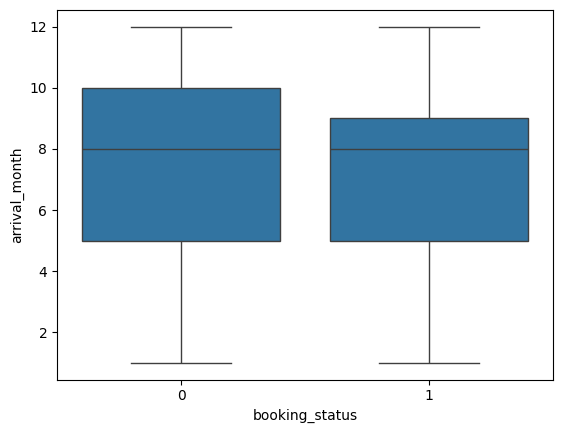

In [33]:
sns.boxplot(x_train, x=y_train, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

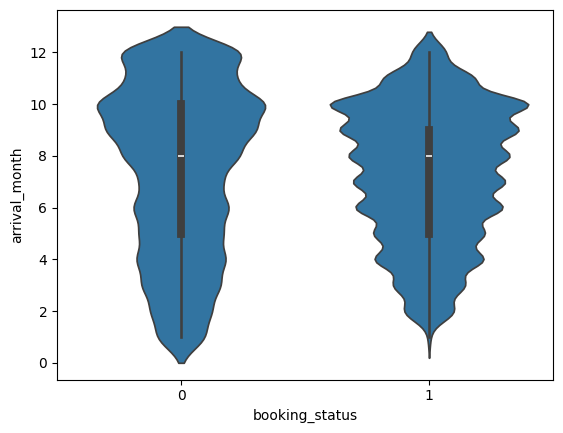

In [34]:
sns.violinplot(x_train, x=y_train, y='arrival_month') 

<Axes: xlabel='booking_status', ylabel='lead_time'>

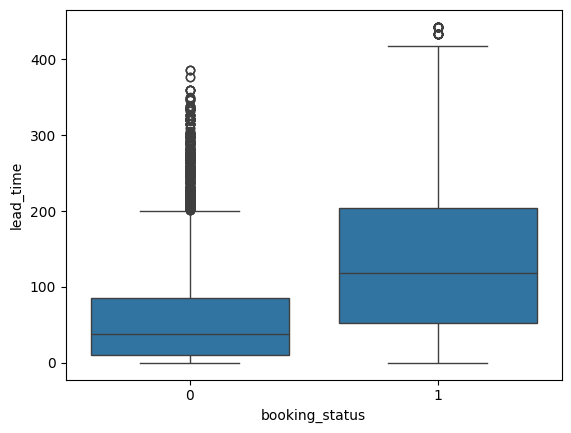

In [35]:
sns.boxplot(x_train, x=y_train, y='lead_time')

# Correlação entre features

In [36]:
correlecao = pd.concat([x_train, y_train], axis=1).corr()

<Axes: >

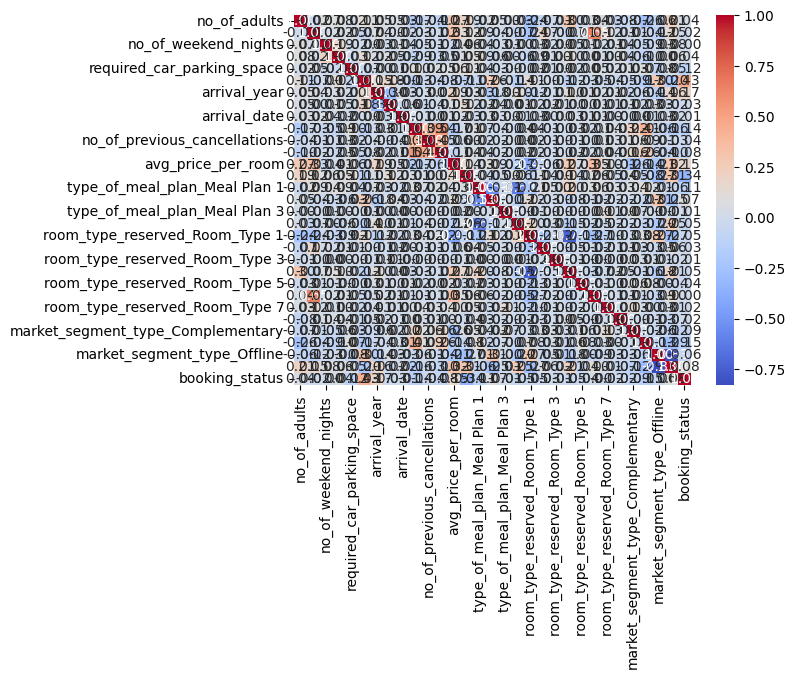

In [37]:
sns.heatmap(correlecao, annot=True, cmap='coolwarm', fmt='.2f')

<Axes: >

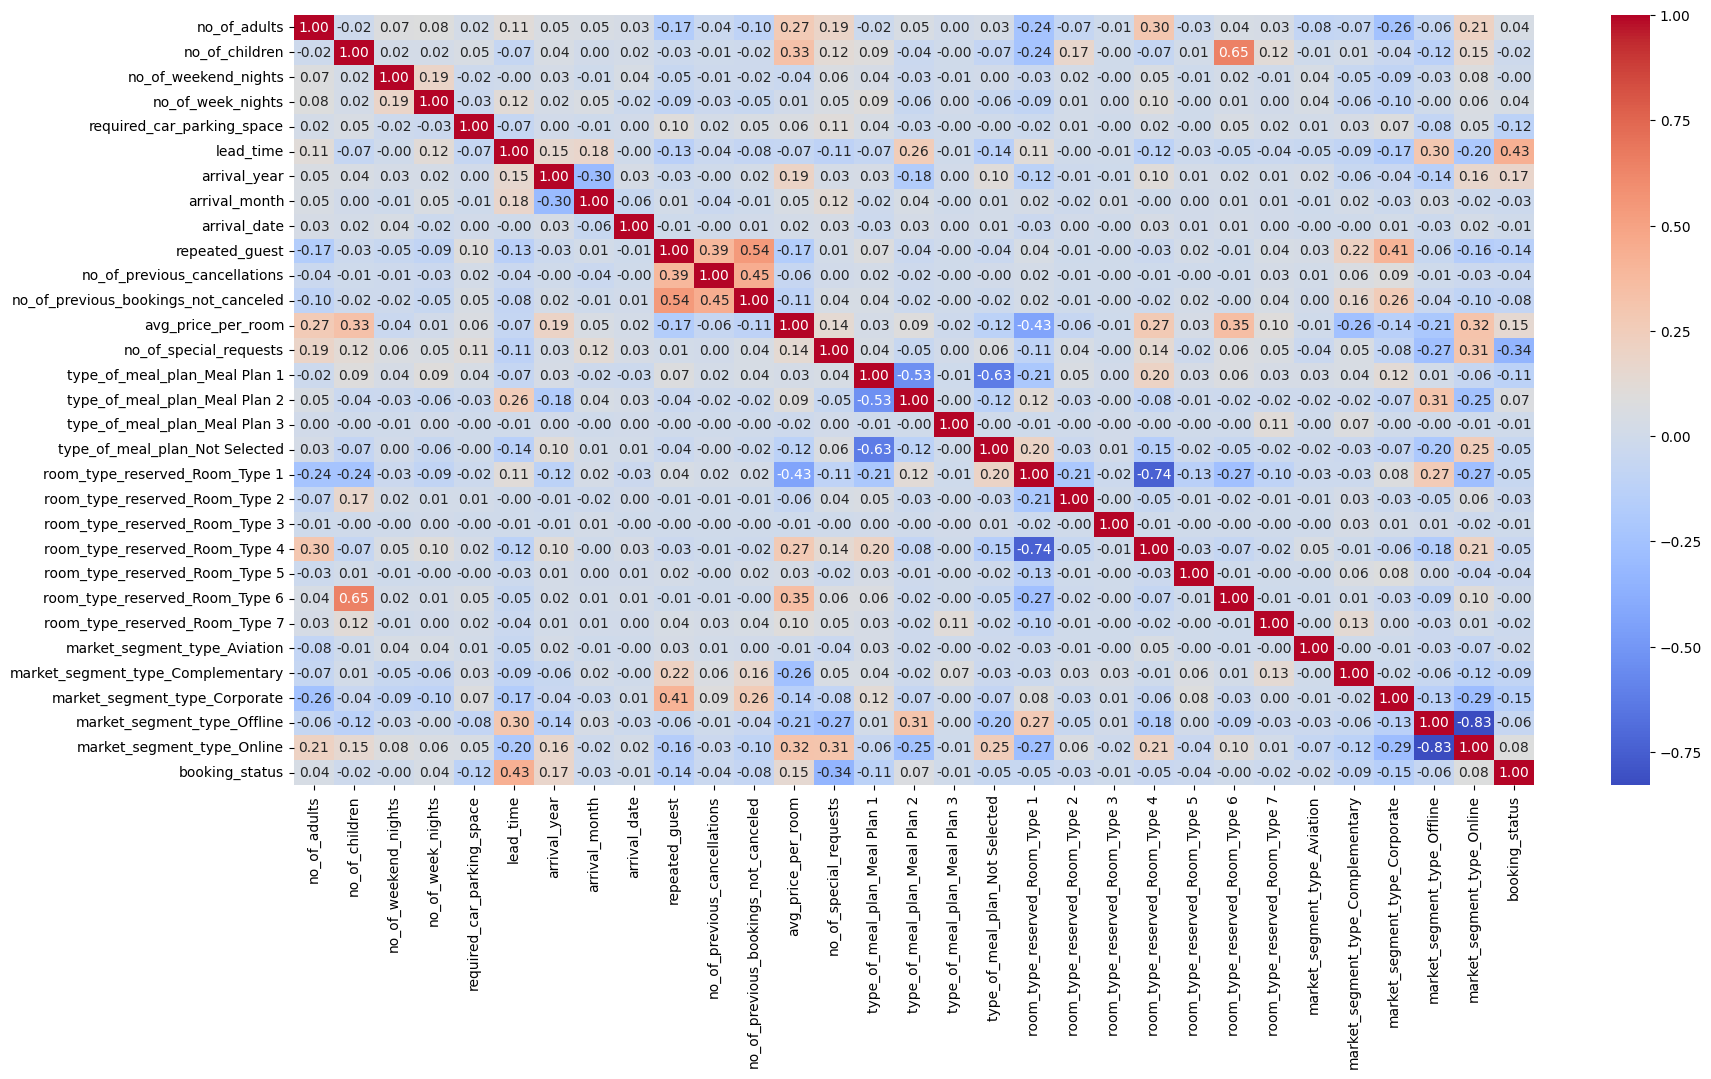

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlecao, annot=True, cmap='coolwarm', fmt='.2f')

### Identificando as features importantes de acordo com o RandomForestClassifier

In [39]:
rfc.feature_importances_

array([2.24533588e-02, 5.74179351e-03, 3.17549138e-02, 4.73535010e-02,
       8.56661469e-03, 2.83828346e-01, 2.36090084e-02, 8.55979884e-02,
       8.23939284e-02, 4.19694499e-03, 4.64355673e-04, 2.68056078e-03,
       1.37017865e-01, 1.37129856e-01, 1.50643354e-02, 9.81369588e-03,
       9.40519723e-06, 1.00358358e-02, 9.71973107e-03, 2.63968029e-03,
       5.78834536e-05, 7.79609257e-03, 2.21700197e-03, 1.50837806e-03,
       4.10442195e-04, 8.23193388e-04, 2.07244064e-03, 1.23178537e-02,
       2.97493187e-02, 2.29756754e-02])

In [40]:
importancia = pd.DataFrame({'colunas': x_train.columns, 'importancia': rfc.feature_importances_})
importancia

,colunas,importancia
0,no_of_adults,0.022453
1,no_of_children,0.005742
2,no_of_weekend_nights,0.031755
3,no_of_week_nights,0.047354
4,required_car_parking_space,0.008567
5,lead_time,0.283828
6,arrival_year,0.023609
7,arrival_month,0.085598
8,arrival_date,0.082394
9,repeated_guest,0.004197


In [42]:
importancia_10 = importancia.sort_values('importancia', ascending=False).head(10)

C:\Users\enama\AppData\Local\Temp\ipykernel_31472\1502683467.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75);


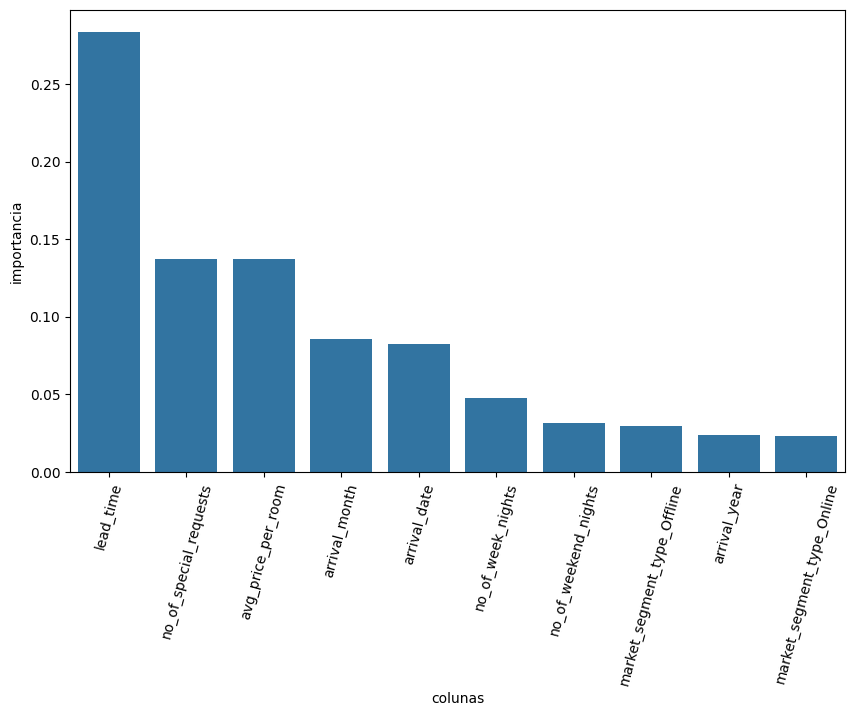

In [46]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=importancia_10, x='colunas', y='importancia')
ax.set_xticklabels(ax.get_xticklabels(), rotation=75);

# SelectFromModel

In [47]:
from sklearn.feature_selection import SelectFromModel

In [48]:
model_fselecionadas = SelectFromModel(rfc, max_features=10, prefit=True)

In [49]:
x_train_selecionado = model_fselecionadas.transform(x_train)
x_test_selecionado = model_fselecionadas.transform(x_test)

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [50]:
rfc = RandomForestClassifier(random_state=2)

In [51]:
rfc.fit(x_train_selecionado, y_train)

RandomForestClassifier(random_state=2)

In [52]:
rfc.score(x_test_selecionado, y_test)

0.8976962124170246

In [55]:
model_fselecionadas.get_support()

array([False, False, False,  True, False,  True, False,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [60]:
colunas_selecionadas = x_train.columns[model_fselecionadas.get_support()]
colunas_selecionadas = colunas_selecionadas.to_list()
colunas_selecionadas

['no_of_week_nights',
 'lead_time',
 'arrival_month',
 'arrival_date',
 'avg_price_per_room',
 'no_of_special_requests']

# Validação Cruzada

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
rfc = RandomForestClassifier(random_state=2)

In [72]:
rfc_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

In [73]:
grid_search = GridSearchCV(estimator=rfc,
                          param_grid=rfc_params,
                          scoring='accuracy',
                          cv=5,
                          n_jobs=-1)

In [74]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [75]:
grid_search.cv_results_

{'mean_fit_time': array([2.40520458, 4.60010338, 7.23594518, 2.28444729, 4.60368605,
        6.65958242, 2.2136013 , 4.17239618, 6.37136626, 1.96903257,
        4.32812495, 5.80552187, 1.46916018, 2.70549617, 4.48228726,
        1.29087257, 2.76502976, 4.13254576, 1.33713331, 2.64695539,
        3.90173483, 1.38754687, 2.68090725, 4.01310639, 2.24209652,
        4.23580494, 5.86863737, 2.15503631, 4.20755982, 6.1156816 ,
        2.07926097, 4.0097723 , 5.28045893, 1.94191236, 3.44949889,
        4.13304973]),
 'std_fit_time': array([0.18052674, 0.43565465, 0.61359969, 0.29884851, 0.33174024,
        0.27319752, 0.22497587, 0.2393527 , 0.59002202, 0.08768268,
        0.58202265, 0.27881756, 0.19782669, 0.08470819, 0.56001896,
        0.10045478, 0.18090221, 0.44882885, 0.08701207, 0.14212034,
        0.19676619, 0.11825199, 0.27318953, 0.22121397, 0.22152836,
        0.12027861, 0.16585183, 0.28681674, 0.38118425, 0.44338443,
        0.16717792, 0.43264765, 0.07806405, 0.24970204, 0.170

In [76]:
model_fselecionadas = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [77]:
x_train_selecionado = model_fselecionadas.transform(x_train)
x_test_selecionado = model_fselecionadas.transform(x_test)

c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\enama\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [78]:
model = grid_search.best_estimator_

In [79]:
model.fit(x_train_selecionado, y_train)

RandomForestClassifier(n_estimators=300, random_state=2)

In [80]:
model.score(x_test_selecionado, y_test)

0.8973057399453338

In [86]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [82]:
y_pred = model.predict(x_test_selecionado)

In [83]:
matrix_confusao = confusion_matrix(y_test, y_pred)

Text(50.722222222222214, 0.5, 'Classe Real')

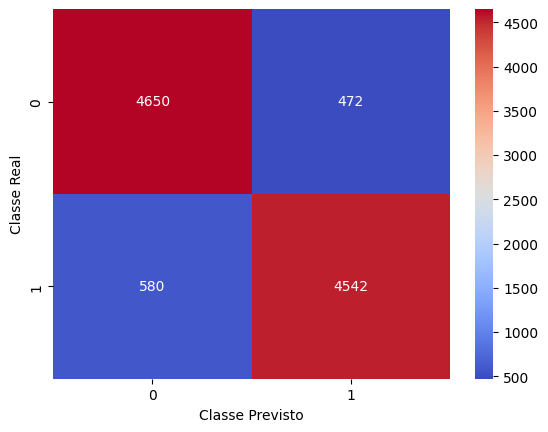

In [85]:
sns.heatmap(matrix_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe Previsto')
plt.ylabel('Classe Real')

In [88]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

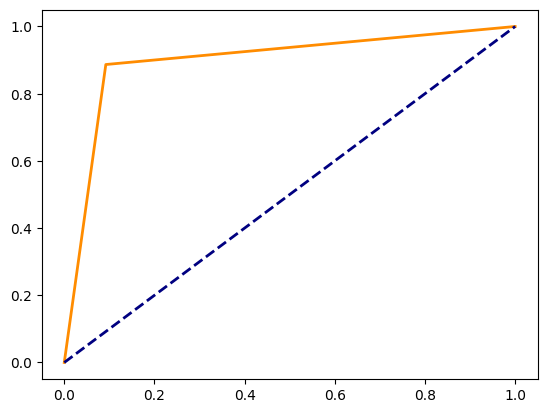

In [90]:
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

In [91]:
roc_auc = auc(fpr, tpr)
roc_auc

np.float64(0.8973057399453339)

# RFE

In [92]:
from sklearn.feature_selection import RFE

In [93]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [94]:
parametros = {'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state': 2} 

In [95]:
rfc = RandomForestClassifier(**parametros)

In [96]:
selecionador = RFE(estimator=rfc, n_features_to_select=10, step=1)

In [97]:
selecionador.fit(x_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [98]:
x_train_selecionado = selecionador.transform(x_train)
x_test_selecionado = selecionador.transform(x_test)

In [99]:
rfc.fit(x_train_selecionado, y_train)

RandomForestClassifier(n_estimators=300, random_state=2)

In [100]:
rfc.score(x_test_selecionado, y_test)

0.9126317844591956

<Axes: >

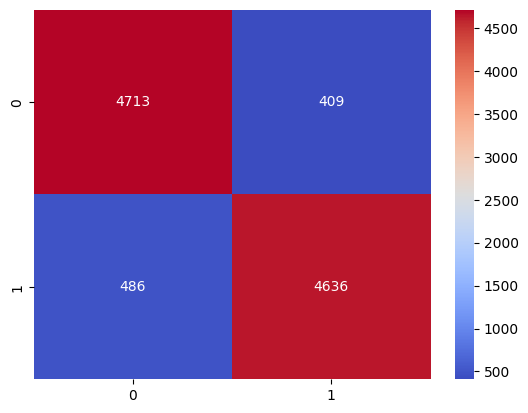

In [101]:
y_pred = rfc.predict(x_test_selecionado)
matrix_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusao, annot=True, cmap='coolwarm', fmt='d')

# RFECV

In [104]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [105]:
cv = StratifiedKFold(n_splits=5, random_state=500, shuffle=True)
rfecv = RFECV(estimator=rfc, step=1, cv=cv, scoring='roc_auc', min_features_to_select=1, importance_getter='auto')

In [106]:
rfecv.fit(x_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, random_state=2),
      scoring='roc_auc')

In [107]:
print(f'O número ideial de features: {rfecv.n_features_}')

O número ideial de features: 25


In [108]:
print(f'O ranking das features: {rfecv.ranking_}')

O ranking das features: [1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]


In [109]:
print(f'Score: {rfecv.score(x_test, y_test)}')

Score: 0.9214174150722374


In [110]:
print(f'Resultados: {rfecv.cv_results_}')

Resultados: {'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.77913523, 0.88305492, 0.90862325, 0.94651964, 0.95776255,
       0.95994017, 0.96338291, 0.96326103, 0.96628728,

<Axes: >

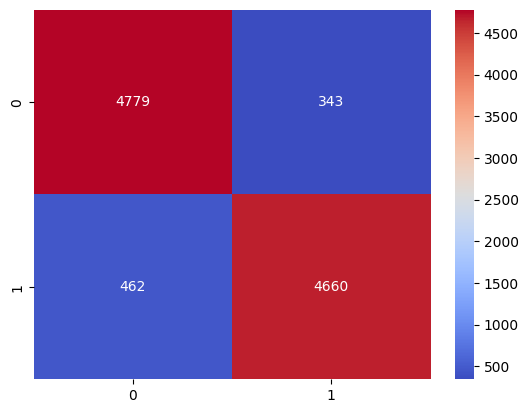

In [111]:
y_pred = rfecv.predict(x_test)
matrix_confusao = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_confusao, annot=True, cmap='coolwarm', fmt='d')

In [112]:
resultado = rfecv.cv_results_
resultado['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

<Axes: xlabel='None', ylabel='Valores'>

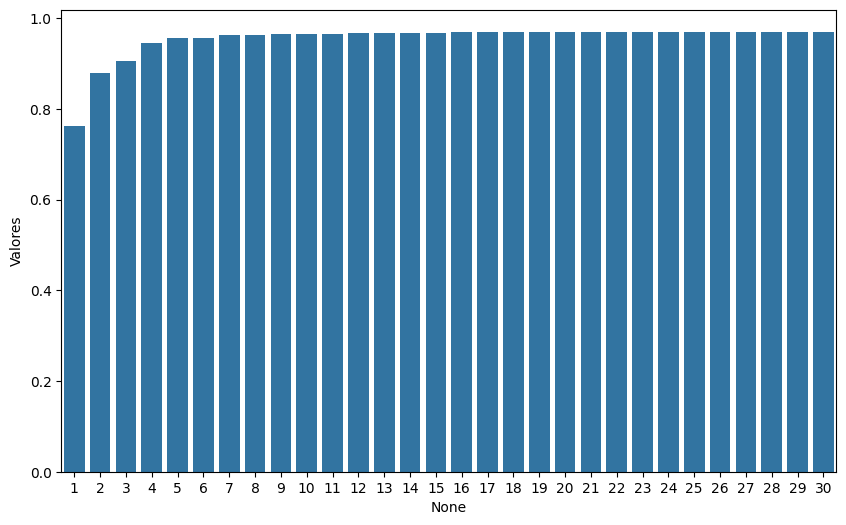

In [118]:
results_df = pd.DataFrame({'Valores': resultado['mean_test_score']})

plt.figure(figsize=(10, 6))  
sns.barplot(x=results_df.index+1, y='Valores', data=results_df)